In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:


# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

filtered_data_RFL = data_RFL

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL

,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,WindSpeedMin,SYNOPCode_0,SYNOPCode_3,SYNOPCode_4,SYNOPCode_5,SYNOPCode_6,SYNOPCode_7,SYNOPCode_8,sin_time,cos_time
0,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,0.0,...,3.007939,1,0,0,0,0,0,0,0.707107,-0.707107
1,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,0.0,...,2.537393,1,0,0,0,0,0,0,0.707107,-0.707107
2,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,0.0,...,1.640809,1,0,0,0,0,0,0,0.500000,-0.866025
3,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,0.0,...,0.886951,1,0,0,0,0,0,0,0.500000,-0.866025
4,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,0.0,...,1.874052,1,0,0,0,0,0,0,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1,0,0,0,0,0,0,0.866025,0.500000
91375,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,0.0,...,0.069834,1,0,0,0,0,0,0,0.866025,0.500000
91376,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,0.0,...,0.049824,1,0,0,0,0,0,0,0.866025,0.500000
91377,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,0.0,...,0.413146,1,0,0,0,0,0,0,0.965926,0.258819


In [3]:
# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [4]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.3, random_state=42)


### MLP test

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import Hyperband
from sklearn.model_selection import train_test_split
# Data preparation for RFL
X_RFL = df_RFL.drop('RFL_Att', axis=1)
y_RFL = df_RFL['RFL_Att']


Using TensorFlow backend


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_32560\2166347070.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [6]:
X_RFL.columns

Index(['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin',
       'Distance', 'Frequency', 'Particulate', 'ParticulateMax',
       'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin', 'SYNOPCode_0',
       'SYNOPCode_3', 'SYNOPCode_4', 'SYNOPCode_5', 'SYNOPCode_6',
       'SYNOPCode_7', 'SYNOPCode_8', 'sin_time', 'cos_time'],
      dtype='object')

In [7]:
#sample_X_RFL = [X_RFL[X_RFL["SYNOPCode_" + str(i)] == 1].sample(n=100,random_state=42) for i in [0, 3, 4, 5, 6, 7, 8]]
#sample_X_RFL = pd.concat(sample_X_RFL, ignore_index=False)
#sample_X_RFL.head() 

In [8]:
#len(sample_X_RFL[sample_X_RFL["SYNOPCode_0"] == 1])

In [9]:
#X_RFL = sample_X_RFL
#y_RFL = y_RFL.loc[X_RFL.index]

In [10]:
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.3, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_RFL = scaler.fit_transform(X_train_RFL)
X_test_RFL = scaler.transform(X_test_RFL)

In [12]:
from tensorflow.keras import layers
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
import os

# Ensure the tuner directories are clean
if os.path.exists('rfl_mlp'):
    import shutil
    shutil.rmtree('rfl_mlp')

# Model definition for RFL
def build_model_RFL(hp):
    model = tf.keras.Sequential()
    
    activation_choice = hp.Choice('activation_function', ['relu', 'sigmoid', 'tanh'])
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=1024, step=32),
                           activation=activation_choice,
                           kernel_regularizer=tf.keras.regularizers.l2(hp.Float('reg_rate', 0.001, 0.1, step=0.01)),
                           input_shape=(X_train_RFL.shape[1],)))
    
    if hp.Boolean('batch_norm_input'):
        model.add(layers.BatchNormalization(
            momentum=hp.Float('batch_norm_momentum_input', min_value=0.9, max_value=0.999, step=0.01),
            epsilon=hp.Float('batch_norm_epsilon_input', min_value=1e-7, max_value=1e-3, sampling='LOG')
        ))
    
    model.add(layers.Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.7, step=0.1)))

    for i in range(hp.Int('n_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation=activation_choice,
                               kernel_regularizer=tf.keras.regularizers.l2(hp.Float(f'reg_rate_{i}', 0.001, 0.1, step=0.01))))
        
        if hp.Boolean(f'batch_norm_{i}'):
            model.add(layers.BatchNormalization(
                momentum=hp.Float(f'batch_norm_momentum_{i}', min_value=0.9, max_value=0.999, step=0.01),
                epsilon=hp.Float(f'batch_norm_epsilon_{i}', min_value=1e-7, max_value=1e-3, sampling='LOG')
            ))
        
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i+1}', min_value=0.0, max_value=0.7, step=0.1)))

    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    return model

# Hyperparameter tuner setup for RFL
tuner_RFL = RandomSearch(
    build_model_RFL,
    objective='val_mean_absolute_error',
    max_trials=20,  # Increased number of trials to get better results
    executions_per_trial=1,  # One execution per trial to save time
    directory='rfl_mlp',
    project_name='rfl'
)

# Tuning the RFL model
tuner_RFL.search(X_train_RFL, y_train_RFL, epochs=20, validation_split=0.2)

# After tuning, extract the best models and parameters for RFL
best_model_RFL = tuner_RFL.get_best_models(num_models=1)[0]
best_hyperparameters_RFL = tuner_RFL.get_best_hyperparameters()[0]

print("Best Hyperparameters for RFL:", best_hyperparameters_RFL.values)

# Function to get best model by condition for RFL
def get_best_model_and_params_by_condition_RFL(condition_key, condition_value):
    sorted_trials_RFL = sorted(
        [trial for trial in tuner_RFL.oracle.get_best_trials(num_trials=50) if trial.score is not None],
        key=lambda trial: trial.score,
        reverse=True
    )
    for trial in sorted_trials_RFL:
        if trial.hyperparameters.values.get(condition_key) == condition_value:
            best_model = tuner_RFL.hypermodel.build(trial.hyperparameters)
            best_model.fit(X_train_RFL, y_train_RFL, epochs=50, validation_split=0.2)
            best_params = trial.hyperparameters.values
            return best_model, best_params
    return None, None

# Get best models for all hyperparameters for RFL
best_relu_model_RFL, best_relu_params_RFL = get_best_model_and_params_by_condition_RFL('activation_function', 'relu')
best_sigmoid_model_RFL, best_sigmoid_params_RFL = get_best_model_and_params_by_condition_RFL('activation_function', 'sigmoid')
best_tanh_model_RFL, best_tanh_params_RFL = get_best_model_and_params_by_condition_RFL('activation_function', 'tanh')

print("Best ReLU Model Parameters:", best_relu_params_RFL)
print("Best Sigmoid Model Parameters:", best_sigmoid_params_RFL)
print("Best Tanh Model Parameters:", best_tanh_params_RFL)

# Evaluate the best models on the test data
if best_relu_model_RFL:
    print("Evaluating best ReLU model:")
    best_relu_model_RFL.evaluate(X_test_RFL, y_test_RFL)

if best_sigmoid_model_RFL:
    print("Evaluating best Sigmoid model:")
    best_sigmoid_model_RFL.evaluate(X_test_RFL, y_test_RFL)

if best_tanh_model_RFL:
    print("Evaluating best Tanh model:")
    best_tanh_model_RFL.evaluate(X_test_RFL, y_test_RFL)

Trial 20 Complete [00h 02m 11s]
val_mean_absolute_error: 0.9260793328285217

Best val_mean_absolute_error So Far: 0.603832483291626
Total elapsed time: 02h 06m 10s
Best Hyperparameters for RFL: {'activation_function': 'tanh', 'units_input': 832, 'reg_rate': 0.041, 'batch_norm_input': True, 'dropout_1': 0.5, 'n_layers': 4, 'units_0': 128, 'reg_rate_0': 0.041, 'batch_norm_0': True, 'learning_rate': 0.0001, 'units_1': 192, 'reg_rate_1': 0.001, 'batch_norm_1': True, 'dropout_2': 0.0, 'units_2': 32, 'reg_rate_2': 0.051000000000000004, 'batch_norm_2': False, 'dropout_3': 0.30000000000000004, 'batch_norm_momentum_0': 0.98, 'batch_norm_epsilon_0': 0.0006692466516213222, 'batch_norm_momentum_input': 0.91, 'batch_norm_epsilon_input': 0.0001440417661234098, 'batch_norm_momentum_1': 0.99, 'batch_norm_epsilon_1': 1.4275735359731503e-05, 'batch_norm_momentum_2': 0.9, 'batch_norm_epsilon_2': 3.7350162146078943e-06, 'units_3': 416, 'reg_rate_3': 0.051000000000000004, 'batch_norm_3': False, 'dropout_4'

1600/1600 [==============================] - 36s 23ms/step - loss: 14.7113 - mean_absolute_error: 1.3613 - val_loss: 19.1394 - val_mean_absolute_error: 2.4904
Epoch 44/50
1600/1600 [==============================] - 35s 22ms/step - loss: 14.1842 - mean_absolute_error: 1.3550 - val_loss: 18.7863 - val_mean_absolute_error: 2.5284
Epoch 45/50
1600/1600 [==============================] - 31s 19ms/step - loss: 13.6626 - mean_absolute_error: 1.3461 - val_loss: 17.1464 - val_mean_absolute_error: 2.2965
Epoch 46/50
1600/1600 [==============================] - 29s 18ms/step - loss: 13.1725 - mean_absolute_error: 1.3390 - val_loss: 16.4965 - val_mean_absolute_error: 2.2578
Epoch 47/50
1600/1600 [==============================] - 30s 19ms/step - loss: 12.6949 - mean_absolute_error: 1.3190 - val_loss: 14.9700 - val_mean_absolute_error: 2.0148
Epoch 48/50
1600/1600 [==============================] - 27s 17ms/step - loss: 12.2385 - mean_absolute_error: 1.3120 - val_loss: 14.6664 - val_mean_absolute_

1600/1600 [==============================] - 27s 17ms/step - loss: 4.6912 - mean_absolute_error: 1.3120 - val_loss: 3.3336 - val_mean_absolute_error: 0.9318
Epoch 40/50
1600/1600 [==============================] - 29s 18ms/step - loss: 4.6926 - mean_absolute_error: 1.3128 - val_loss: 3.3728 - val_mean_absolute_error: 0.9456
Epoch 41/50
1600/1600 [==============================] - 26s 16ms/step - loss: 4.6717 - mean_absolute_error: 1.3099 - val_loss: 3.3966 - val_mean_absolute_error: 0.9649
Epoch 42/50
1600/1600 [==============================] - 22s 14ms/step - loss: 4.7041 - mean_absolute_error: 1.3111 - val_loss: 3.5435 - val_mean_absolute_error: 1.0172
Epoch 43/50
1600/1600 [==============================] - 22s 14ms/step - loss: 4.6572 - mean_absolute_error: 1.3030 - val_loss: 3.4228 - val_mean_absolute_error: 0.9556
Epoch 44/50
1600/1600 [==============================] - 22s 14ms/step - loss: 4.6497 - mean_absolute_error: 1.3045 - val_loss: 3.5149 - val_mean_absolute_error: 1.050

1999/1999 [==============================] - 6s 3ms/step
ReLU_RFL: MAE: 1.7612642289794274 RMSE: 2.121389651721025 R²: 0.6207022216991598
Sigmoid_RFL: MAE: 1.905820518366791 RMSE: 2.6334812388810462 R²: 0.4154793421708114
Tanh_RFL: MAE: 0.9270645558112384 RMSE: 1.5863944474321852 R²: 0.7878896946816466
ReLU Model RFL:


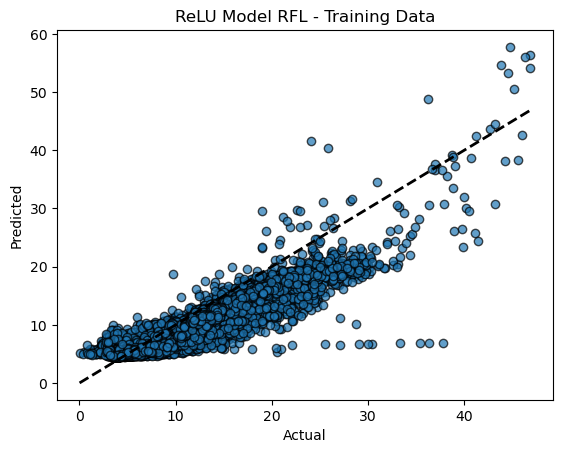

Sigmoid Model RFL:


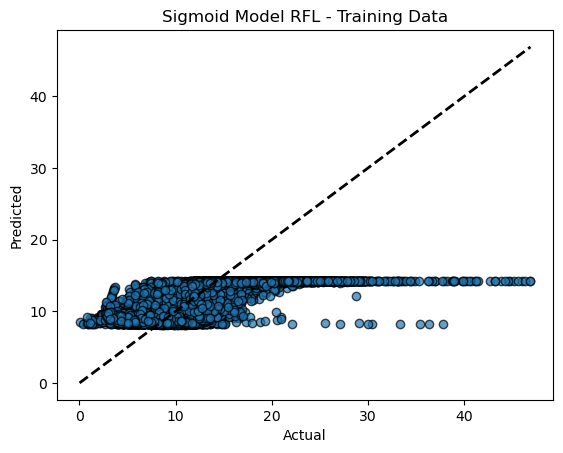

Tanh Model RFL:


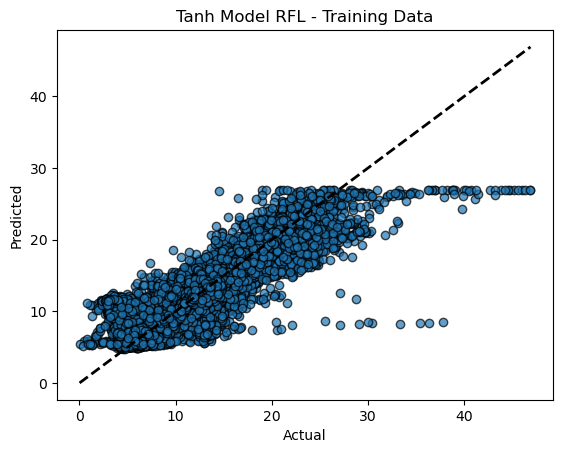

857/857 [==============================] - 4s 4ms/step
ReLU_RFL: MAE: 1.7618884245807118 RMSE: 2.1204902377613832 R²: 0.6168043500535869
Sigmoid_RFL: MAE: 1.9022570682992774 RMSE: 2.605490337228922 R²: 0.4214685815999081
Tanh_RFL: MAE: 0.9232958981410434 RMSE: 1.5671236292392487 R²: 0.7907070817923681
ReLU Model RFL:


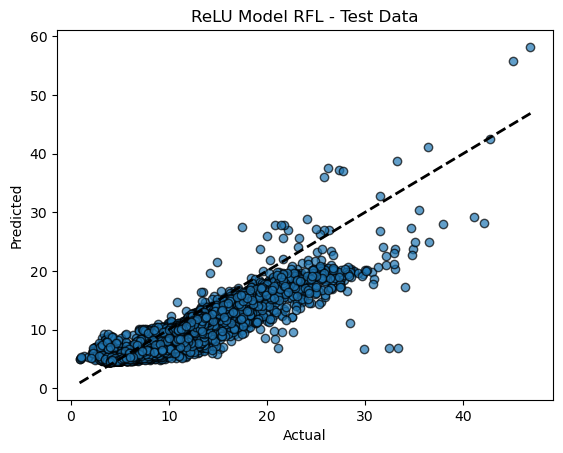

Sigmoid Model RFL:


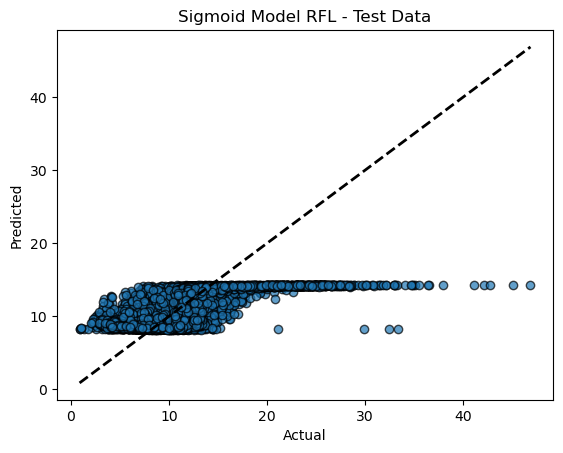

Tanh Model RFL:


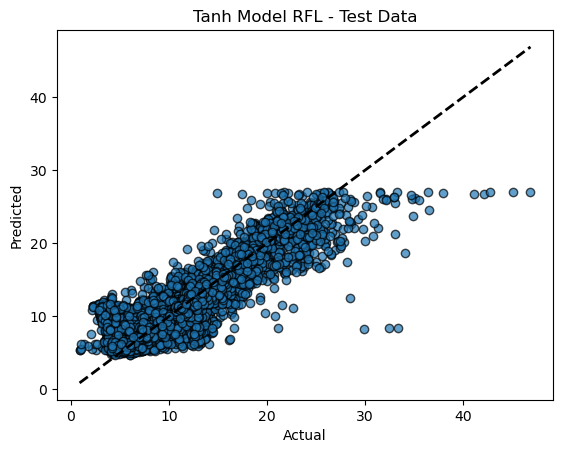

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the train data for RFL
def predict_data_RFL(model, data):
    return model.predict(data).flatten()

y_pred_relu_RFL = predict_data_RFL(best_relu_model_RFL, X_train_RFL)
y_pred_sigmoid_RFL = predict_data_RFL(best_sigmoid_model_RFL, X_train_RFL)
y_pred_tanh_RFL = predict_data_RFL(best_tanh_model_RFL, X_train_RFL)

# Compute the metrics for RFL
def get_metrics_RFL(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return mae, rmse, r2

metrics_relu_RFL = get_metrics_RFL(y_train_RFL, y_pred_relu_RFL)
metrics_sigmoid_RFL = get_metrics_RFL(y_train_RFL, y_pred_sigmoid_RFL)
metrics_tanh_RFL = get_metrics_RFL(y_train_RFL, y_pred_tanh_RFL)

print("ReLU_RFL: MAE:", metrics_relu_RFL[0], "RMSE:", metrics_relu_RFL[1], "R²:", metrics_relu_RFL[2])
print("Sigmoid_RFL: MAE:", metrics_sigmoid_RFL[0], "RMSE:", metrics_sigmoid_RFL[1], "R²:", metrics_sigmoid_RFL[2])
print("Tanh_RFL: MAE:", metrics_tanh_RFL[0], "RMSE:", metrics_tanh_RFL[1], "R²:", metrics_tanh_RFL[2])

# Function to plot the actual vs. predicted values for RFL
def plot_actual_vs_predicted_RFL(y_true, y_pred, title):
    plt.figure()
    plt.scatter(y_true, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plotting actual vs. predicted for RFL models
print("ReLU Model RFL:")
plot_actual_vs_predicted_RFL(y_train_RFL, y_pred_relu_RFL, 'ReLU Model RFL - Training Data')

print("Sigmoid Model RFL:")
plot_actual_vs_predicted_RFL(y_train_RFL, y_pred_sigmoid_RFL, 'Sigmoid Model RFL - Training Data')

print("Tanh Model RFL:")
plot_actual_vs_predicted_RFL(y_train_RFL, y_pred_tanh_RFL, 'Tanh Model RFL - Training Data')

# Predict the test data for RFL models
y_pred_relu_RFL = predict_data_RFL(best_relu_model_RFL, X_test_RFL)
y_pred_sigmoid_RFL = predict_data_RFL(best_sigmoid_model_RFL, X_test_RFL)
y_pred_tanh_RFL = predict_data_RFL(best_tanh_model_RFL, X_test_RFL)

# Compute the metrics for the RFL test predictions
metrics_relu_RFL = get_metrics_RFL(y_test_RFL, y_pred_relu_RFL)
metrics_sigmoid_RFL = get_metrics_RFL(y_test_RFL, y_pred_sigmoid_RFL)
metrics_tanh_RFL = get_metrics_RFL(y_test_RFL, y_pred_tanh_RFL)

print("ReLU_RFL: MAE:", metrics_relu_RFL[0], "RMSE:", metrics_relu_RFL[1], "R²:", metrics_relu_RFL[2])
print("Sigmoid_RFL: MAE:", metrics_sigmoid_RFL[0], "RMSE:", metrics_sigmoid_RFL[1], "R²:", metrics_sigmoid_RFL[2])
print("Tanh_RFL: MAE:", metrics_tanh_RFL[0], "RMSE:", metrics_tanh_RFL[1], "R²:", metrics_tanh_RFL[2])

# Plotting actual vs. predicted for RFL test predictions
print("ReLU Model RFL:")
plot_actual_vs_predicted_RFL(y_test_RFL, y_pred_relu_RFL, 'ReLU Model RFL - Test Data')

print("Sigmoid Model RFL:")
plot_actual_vs_predicted_RFL(y_test_RFL, y_pred_sigmoid_RFL, 'Sigmoid Model RFL - Test Data')

print("Tanh Model RFL:")
plot_actual_vs_predicted_RFL(y_test_RFL, y_pred_tanh_RFL, 'Tanh Model RFL - Test Data')


------------------

# FSO

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

filtered_data_FSO = data_FSO

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,WindSpeedMin,SYNOPCode_0,SYNOPCode_3,SYNOPCode_4,SYNOPCode_5,SYNOPCode_6,SYNOPCode_7,SYNOPCode_8,sin_time,cos_time
0,7.913289,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,0.0,...,3.007939,1,0,0,0,0,0,0,0.707107,-0.707107
1,7.451176,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,0.0,...,2.537393,1,0,0,0,0,0,0,0.707107,-0.707107
2,7.072747,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,0.0,...,1.640809,1,0,0,0,0,0,0,0.500000,-0.866025
3,6.949288,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,0.0,...,0.886951,1,0,0,0,0,0,0,0.500000,-0.866025
4,7.361052,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,0.0,...,1.874052,1,0,0,0,0,0,0,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1,0,0,0,0,0,0,0.866025,0.500000
91375,9.333777,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,0.0,...,0.069834,1,0,0,0,0,0,0,0.866025,0.500000
91376,8.873168,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,0.0,...,0.049824,1,0,0,0,0,0,0,0.866025,0.500000
91377,9.538886,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,0.0,...,0.413146,1,0,0,0,0,0,0,0.965926,0.258819


In [22]:
# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO


In [23]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.3, random_state=42)


In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import Hyperband
from sklearn.model_selection import train_test_split

# Data preparation for FSO
X_FSO = df_FSO.drop('FSO_Att', axis=1)
y_FSO = df_FSO['FSO_Att']


In [25]:
X_FSO.columns


Index(['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin',
       'Distance', 'Frequency', 'Particulate', 'ParticulateMax',
       'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin', 'SYNOPCode_0',
       'SYNOPCode_3', 'SYNOPCode_4', 'SYNOPCode_5', 'SYNOPCode_6',
       'SYNOPCode_7', 'SYNOPCode_8', 'sin_time', 'cos_time'],
      dtype='object')

In [26]:
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.3, random_state=42)


In [27]:
scaler = StandardScaler()
X_train_FSO = scaler.fit_transform(X_train_FSO)
X_test_FSO = scaler.transform(X_test_FSO)


In [28]:
from tensorflow.keras import layers
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
import os

# Ensure the tuner directories are clean
if os.path.exists('fso_mlp'):
    import shutil
    shutil.rmtree('fso_mlp')

# Model definition for FSO
def build_model_FSO(hp):
    model = tf.keras.Sequential()
    
    activation_choice = hp.Choice('activation_function', ['relu', 'sigmoid', 'tanh'])
    model.add(layers.Dense(units=hp.Int('units_input', min_value=32, max_value=1024, step=32),
                           activation=activation_choice,
                           kernel_regularizer=tf.keras.regularizers.l2(hp.Float('reg_rate', 0.001, 0.1, step=0.01)),
                           input_shape=(X_train_FSO.shape[1],)))
    
    if hp.Boolean('batch_norm_input'):
        model.add(layers.BatchNormalization(
            momentum=hp.Float('batch_norm_momentum_input', min_value=0.9, max_value=0.999, step=0.01),
            epsilon=hp.Float('batch_norm_epsilon_input', min_value=1e-7, max_value=1e-3, sampling='LOG')
        ))
    
    model.add(layers.Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.7, step=0.1)))

    for i in range(hp.Int('n_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation=activation_choice,
                               kernel_regularizer=tf.keras.regularizers.l2(hp.Float(f'reg_rate_{i}', 0.001, 0.1, step=0.01))))
        
        if hp.Boolean(f'batch_norm_{i}'):
            model.add(layers.BatchNormalization(
                momentum=hp.Float(f'batch_norm_momentum_{i}', min_value=0.9, max_value=0.999, step=0.01),
                epsilon=hp.Float(f'batch_norm_epsilon_{i}', min_value=1e-7, max_value=1e-3, sampling='LOG')
            ))
        
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i+1}', min_value=0.0, max_value=0.7, step=0.1)))

    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    return model

# Hyperparameter tuner setup for FSO
tuner_FSO = RandomSearch(
    build_model_FSO,
    objective='val_mean_absolute_error',
    max_trials=20,  # Increased number of trials to get better results
    executions_per_trial=1,  # One execution per trial to save time
    directory='fso_mlp',
    project_name='fso'
)

# Tuning the FSO model
tuner_FSO.search(X_train_FSO, y_train_FSO, epochs=20, validation_split=0.2)

# After tuning, extract the best models and parameters for FSO
best_model_FSO = tuner_FSO.get_best_models(num_models=1)[0]
best_hyperparameters_FSO = tuner_FSO.get_best_hyperparameters()[0]

print("Best Hyperparameters for FSO:", best_hyperparameters_FSO.values)

# Function to get best model by condition for FSO
def get_best_model_and_params_by_condition_FSO(condition_key, condition_value):
    sorted_trials_FSO = sorted(
        [trial for trial in tuner_FSO.oracle.get_best_trials(num_trials=50) if trial.score is not None],
        key=lambda trial: trial.score,
        reverse=True
    )
    for trial in sorted_trials_FSO:
        if trial.hyperparameters.values.get(condition_key) == condition_value:
            best_model = tuner_FSO.hypermodel.build(trial.hyperparameters)
            best_model.fit(X_train_FSO, y_train_FSO, epochs=50, validation_split=0.2)
            best_params = trial.hyperparameters.values
            return best_model, best_params
    return None, None

# Get best models for all hyperparameters for FSO
best_relu_model_FSO, best_relu_params_FSO = get_best_model_and_params_by_condition_FSO('activation_function', 'relu')
best_sigmoid_model_FSO, best_sigmoid_params_FSO = get_best_model_and_params_by_condition_FSO('activation_function', 'sigmoid')
best_tanh_model_FSO, best_tanh_params_FSO = get_best_model_and_params_by_condition_FSO('activation_function', 'tanh')

print("Best ReLU Model Parameters:", best_relu_params_FSO)
print("Best Sigmoid Model Parameters:", best_sigmoid_params_FSO)
print("Best Tanh Model Parameters:", best_tanh_params_FSO)

# Evaluate the best models on the test data
if best_relu_model_FSO:
    print("Evaluating best ReLU model:")
    best_relu_model_FSO.evaluate(X_test_FSO, y_test_FSO)

if best_sigmoid_model_FSO:
    print("Evaluating best Sigmoid model:")
    best_sigmoid_model_FSO.evaluate(X_test_FSO, y_test_FSO)

if best_tanh_model_FSO:
    print("Evaluating best Tanh model:")
    best_tanh_model_FSO.evaluate(X_test_FSO, y_test_FSO)


Trial 20 Complete [00h 02m 16s]
val_mean_absolute_error: 2.4037139415740967

Best val_mean_absolute_error So Far: 0.9512730836868286
Total elapsed time: 01h 07m 14s
Best Hyperparameters for FSO: {'activation_function': 'relu', 'units_input': 672, 'reg_rate': 0.07100000000000001, 'batch_norm_input': False, 'dropout_1': 0.30000000000000004, 'n_layers': 1, 'units_0': 384, 'reg_rate_0': 0.081, 'batch_norm_0': True, 'learning_rate': 0.0001, 'batch_norm_momentum_0': 0.9, 'batch_norm_epsilon_0': 1e-07}
Epoch 1/50
1600/1600 [==============================] - 9s 4ms/step - loss: 93.7443 - mean_absolute_error: 5.6241 - val_loss: 90.2244 - val_mean_absolute_error: 5.4764
Epoch 2/50
1600/1600 [==============================] - 6s 4ms/step - loss: 77.1258 - mean_absolute_error: 4.2726 - val_loss: 77.9558 - val_mean_absolute_error: 4.3553
Epoch 3/50
1600/1600 [==============================] - 6s 4ms/step - loss: 67.4490 - mean_absolute_error: 3.4823 - val_loss: 68.6887 - val_mean_absolute_error: 3.

Epoch 34/50
1600/1600 [==============================] - 6s 4ms/step - loss: 39.0351 - mean_absolute_error: 2.5280 - val_loss: 39.4500 - val_mean_absolute_error: 2.3020
Epoch 35/50
1600/1600 [==============================] - 6s 4ms/step - loss: 38.5212 - mean_absolute_error: 2.5245 - val_loss: 38.6884 - val_mean_absolute_error: 2.2936
Epoch 36/50
1600/1600 [==============================] - 6s 4ms/step - loss: 37.8916 - mean_absolute_error: 2.5094 - val_loss: 38.4108 - val_mean_absolute_error: 2.3047
Epoch 37/50
1600/1600 [==============================] - 6s 4ms/step - loss: 37.2967 - mean_absolute_error: 2.4954 - val_loss: 37.8790 - val_mean_absolute_error: 2.2502
Epoch 38/50
1600/1600 [==============================] - 6s 4ms/step - loss: 36.7642 - mean_absolute_error: 2.4840 - val_loss: 37.3761 - val_mean_absolute_error: 2.2391
Epoch 39/50
1600/1600 [==============================] - 6s 4ms/step - loss: 36.2698 - mean_absolute_error: 2.4832 - val_loss: 36.8626 - val_mean_absolute_

1600/1600 [==============================] - 12s 7ms/step - loss: 13.8230 - mean_absolute_error: 2.4672 - val_loss: 11.9845 - val_mean_absolute_error: 2.2684
Epoch 33/50
1600/1600 [==============================] - 12s 8ms/step - loss: 13.7317 - mean_absolute_error: 2.4605 - val_loss: 11.8652 - val_mean_absolute_error: 2.2669
Epoch 34/50
1600/1600 [==============================] - 12s 8ms/step - loss: 13.8421 - mean_absolute_error: 2.4662 - val_loss: 12.0880 - val_mean_absolute_error: 2.3712
Epoch 35/50
1600/1600 [==============================] - 12s 8ms/step - loss: 13.7879 - mean_absolute_error: 2.4582 - val_loss: 12.1937 - val_mean_absolute_error: 2.2007
Epoch 36/50
1600/1600 [==============================] - 12s 8ms/step - loss: 13.7610 - mean_absolute_error: 2.4593 - val_loss: 11.9723 - val_mean_absolute_error: 2.2129
Epoch 37/50
1600/1600 [==============================] - 12s 8ms/step - loss: 13.7496 - mean_absolute_error: 2.4574 - val_loss: 12.4945 - val_mean_absolute_error:

1600/1600 [==============================] - 6s 3ms/step - loss: 15.8207 - mean_absolute_error: 2.4148 - val_loss: 12.9080 - val_mean_absolute_error: 1.9480
Epoch 31/50
1600/1600 [==============================] - 5s 3ms/step - loss: 15.5934 - mean_absolute_error: 2.3922 - val_loss: 12.9353 - val_mean_absolute_error: 1.9415
Epoch 32/50
1600/1600 [==============================] - 5s 3ms/step - loss: 15.6642 - mean_absolute_error: 2.4001 - val_loss: 12.7293 - val_mean_absolute_error: 1.9413
Epoch 33/50
1600/1600 [==============================] - 5s 3ms/step - loss: 15.5745 - mean_absolute_error: 2.3854 - val_loss: 12.6230 - val_mean_absolute_error: 1.9366
Epoch 34/50
1600/1600 [==============================] - 5s 3ms/step - loss: 15.2772 - mean_absolute_error: 2.3612 - val_loss: 12.6273 - val_mean_absolute_error: 1.9235
Epoch 35/50
1600/1600 [==============================] - 4s 3ms/step - loss: 15.2387 - mean_absolute_error: 2.3574 - val_loss: 12.4908 - val_mean_absolute_error: 1.910

1999/1999 [==============================] - 3s 1ms/step
ReLU_FSO: MAE: 2.1690334981225354 MSE: 11.630919218443262 R²: 0.24255417213868524
Sigmoid_FSO: MAE: 2.233877400777713 MSE: 9.464510352552972 R²: 0.3836382366129971
Tanh_FSO: MAE: 1.7779762909661903 MSE: 7.055902932511382 R²: 0.5404951115514247
ReLU Model FSO - Training Data:


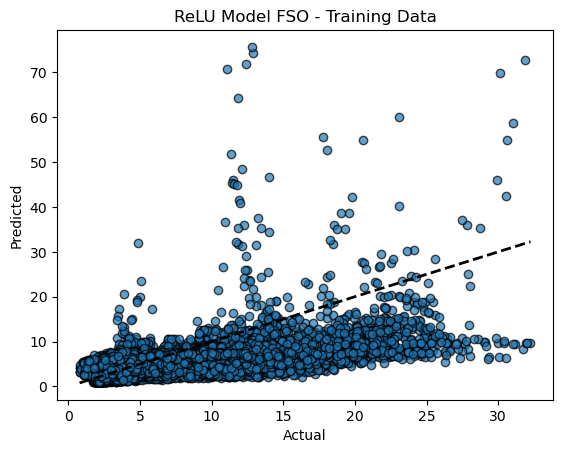

Sigmoid Model FSO - Training Data:


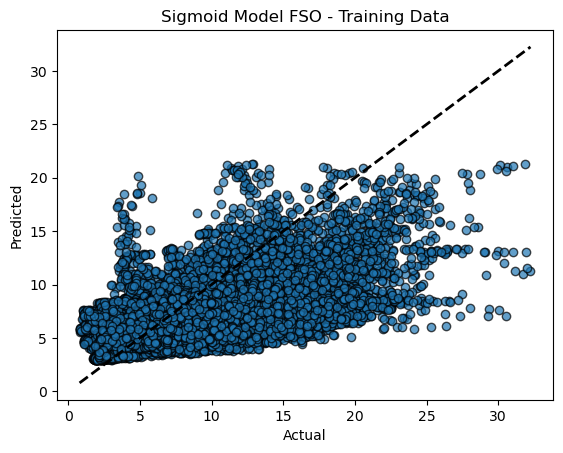

Tanh Model FSO - Training Data:


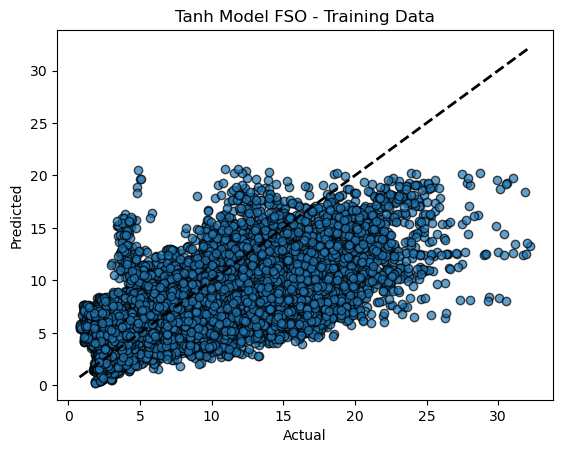

857/857 [==============================] - 1s 920us/step
ReLU_FSO: MAE: 2.124500034344167 MSE: 11.037493702946131 R²: 0.2625050530941234
Sigmoid_FSO: MAE: 2.2054631335553565 MSE: 9.175343480025868 R²: 0.3869288051472528
Tanh_FSO: MAE: 1.7640780780053258 MSE: 6.879817712468736 R²: 0.5403095181630835
ReLU Model FSO - Test Data:


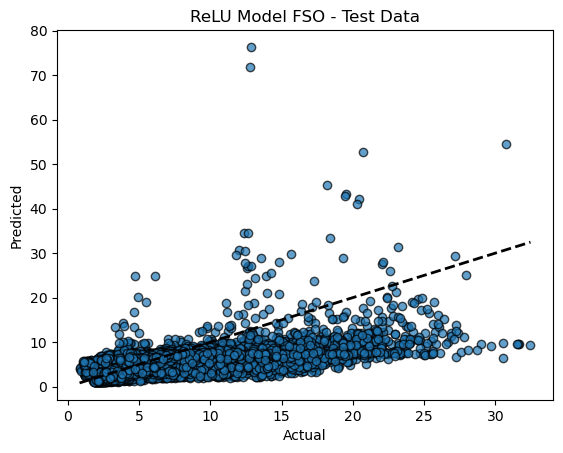

Sigmoid Model FSO - Test Data:


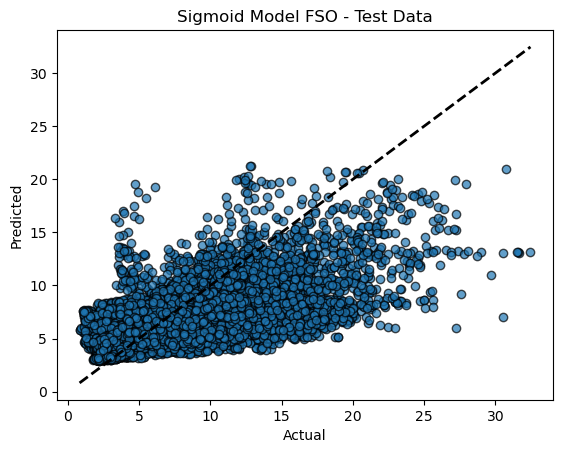

Tanh Model FSO - Test Data:


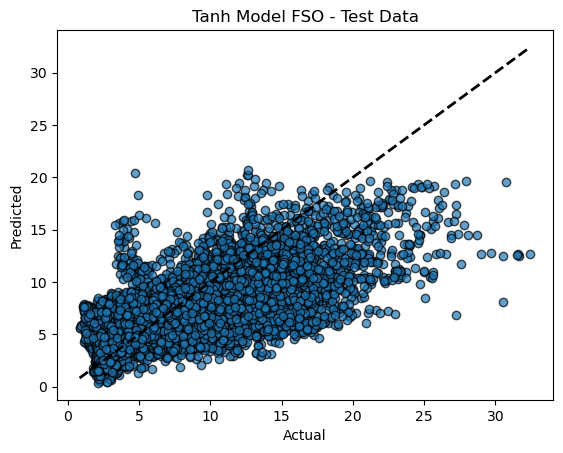

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the train data for FSO
def predict_data_FSO(model, data):
    return model.predict(data).flatten()

y_pred_relu_FSO = predict_data_FSO(best_relu_model_FSO, X_train_FSO)
y_pred_sigmoid_FSO = predict_data_FSO(best_sigmoid_model_FSO, X_train_FSO)
y_pred_tanh_FSO = predict_data_FSO(best_tanh_model_FSO, X_train_FSO)

# Compute the metrics for FSO
def get_metrics_FSO(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, r2

metrics_relu_FSO = get_metrics_FSO(y_train_FSO, y_pred_relu_FSO)
metrics_sigmoid_FSO = get_metrics_FSO(y_train_FSO, y_pred_sigmoid_FSO)
metrics_tanh_FSO = get_metrics_FSO(y_train_FSO, y_pred_tanh_FSO)

print("ReLU_FSO: MAE:", metrics_relu_FSO[0], "MSE:", metrics_relu_FSO[1], "R²:", metrics_relu_FSO[2])
print("Sigmoid_FSO: MAE:", metrics_sigmoid_FSO[0], "MSE:", metrics_sigmoid_FSO[1], "R²:", metrics_sigmoid_FSO[2])
print("Tanh_FSO: MAE:", metrics_tanh_FSO[0], "MSE:", metrics_tanh_FSO[1], "R²:", metrics_tanh_FSO[2])

# Function to plot the actual vs. predicted values for FSO
def plot_actual_vs_predicted_FSO(y_true, y_pred, title):
    plt.figure()
    plt.scatter(y_true, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plotting actual vs. predicted for FSO models
print("ReLU Model FSO - Training Data:")
plot_actual_vs_predicted_FSO(y_train_FSO, y_pred_relu_FSO, 'ReLU Model FSO - Training Data')

print("Sigmoid Model FSO - Training Data:")
plot_actual_vs_predicted_FSO(y_train_FSO, y_pred_sigmoid_FSO, 'Sigmoid Model FSO - Training Data')

print("Tanh Model FSO - Training Data:")
plot_actual_vs_predicted_FSO(y_train_FSO, y_pred_tanh_FSO, 'Tanh Model FSO - Training Data')

# Predict the test data for FSO models
y_pred_relu_FSO = predict_data_FSO(best_relu_model_FSO, X_test_FSO)
y_pred_sigmoid_FSO = predict_data_FSO(best_sigmoid_model_FSO, X_test_FSO)
y_pred_tanh_FSO = predict_data_FSO(best_tanh_model_FSO, X_test_FSO)

# Compute the metrics for the FSO test predictions
metrics_relu_FSO = get_metrics_FSO(y_test_FSO, y_pred_relu_FSO)
metrics_sigmoid_FSO = get_metrics_FSO(y_test_FSO, y_pred_sigmoid_FSO)
metrics_tanh_FSO = get_metrics_FSO(y_test_FSO, y_pred_tanh_FSO)

print("ReLU_FSO: MAE:", metrics_relu_FSO[0], "MSE:", metrics_relu_FSO[1], "R²:", metrics_relu_FSO[2])
print("Sigmoid_FSO: MAE:", metrics_sigmoid_FSO[0], "MSE:", metrics_sigmoid_FSO[1], "R²:", metrics_sigmoid_FSO[2])
print("Tanh_FSO: MAE:", metrics_tanh_FSO[0], "MSE:", metrics_tanh_FSO[1], "R²:", metrics_tanh_FSO[2])

# Plotting actual vs. predicted for FSO test predictions
print("ReLU Model FSO - Test Data:")
plot_actual_vs_predicted_FSO(y_test_FSO, y_pred_relu_FSO, 'ReLU Model FSO - Test Data')

print("Sigmoid Model FSO - Test Data:")
plot_actual_vs_predicted_FSO(y_test_FSO, y_pred_sigmoid_FSO, 'Sigmoid Model FSO - Test Data')

print("Tanh Model FSO - Test Data:")
plot_actual_vs_predicted_FSO(y_test_FSO, y_pred_tanh_FSO, 'Tanh Model FSO - Test Data')


1999/1999 [==============================] - 2s 948us/step
ReLU_FSO: MAE: 2.1690334981225354 RMSE: 3.4104133500857725 R²: 0.24255417213868524
Sigmoid_FSO: MAE: 2.233877400777713 RMSE: 3.076444433522727 R²: 0.3836382366129971
Tanh_FSO: MAE: 1.7779762909661903 RMSE: 2.656294963386292 R²: 0.5404951115514247
ReLU Model FSO - Training Data:


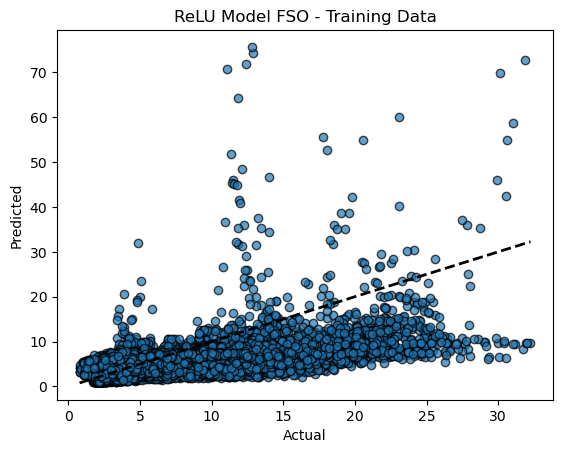

Sigmoid Model FSO - Training Data:


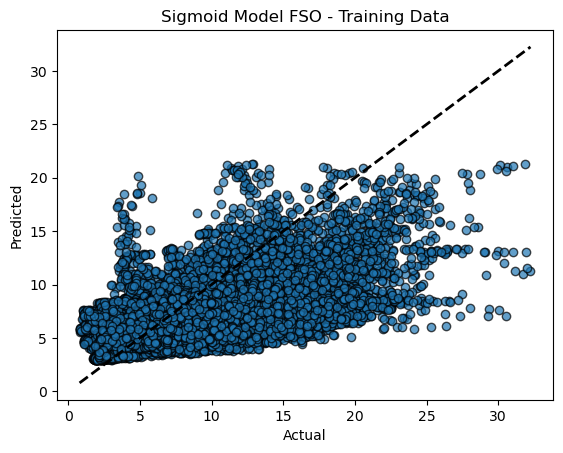

Tanh Model FSO - Training Data:


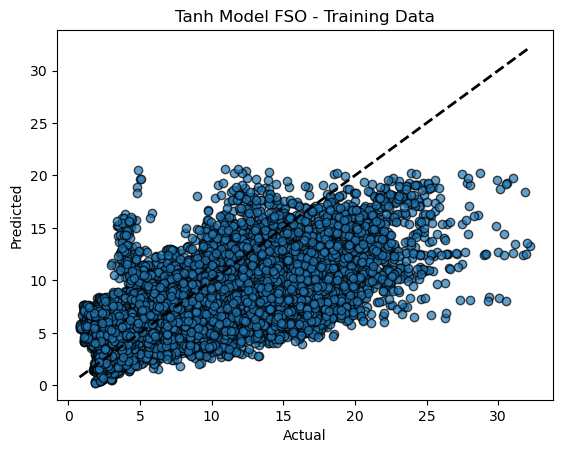

857/857 [==============================] - 1s 1ms/step
ReLU_FSO: MAE: 2.124500034344167 RMSE: 3.322272370373346 R²: 0.2625050530941234
Sigmoid_FSO: MAE: 2.2054631335553565 RMSE: 3.0290829437349296 R²: 0.3869288051472528
Tanh_FSO: MAE: 1.7640780780053258 RMSE: 2.622940661255747 R²: 0.5403095181630835
ReLU Model FSO - Test Data:


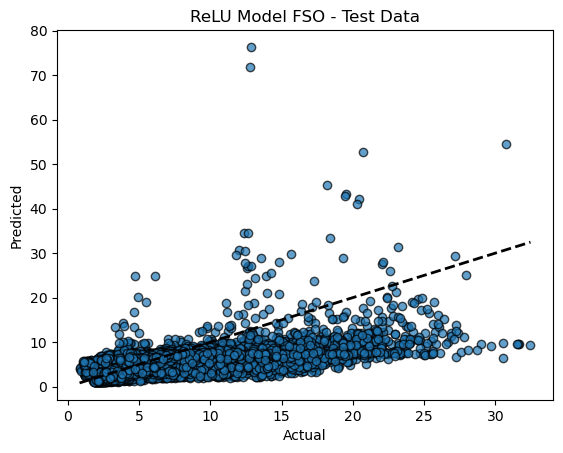

Sigmoid Model FSO - Test Data:


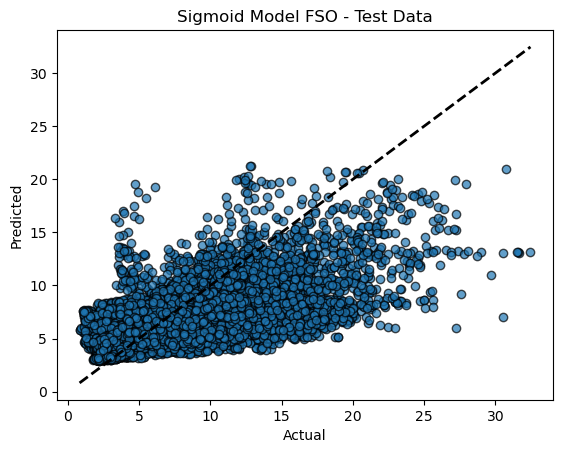

Tanh Model FSO - Test Data:


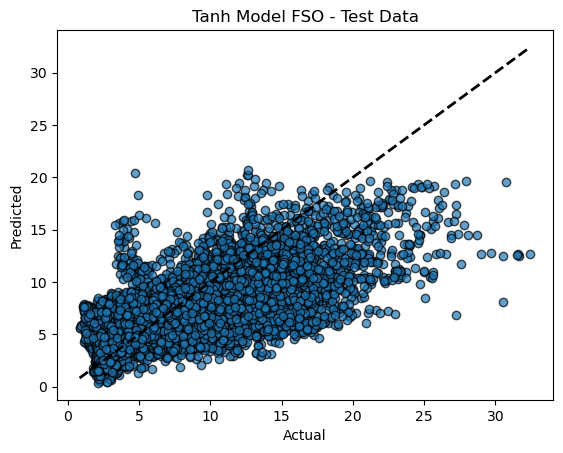

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the train data for FSO
def predict_data_FSO(model, data):
    return model.predict(data).flatten()

y_pred_relu_FSO = predict_data_FSO(best_relu_model_FSO, X_train_FSO)
y_pred_sigmoid_FSO = predict_data_FSO(best_sigmoid_model_FSO, X_train_FSO)
y_pred_tanh_FSO = predict_data_FSO(best_tanh_model_FSO, X_train_FSO)

# Compute the metrics for FSO
def get_metrics_FSO(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return mae, rmse, r2

metrics_relu_FSO = get_metrics_FSO(y_train_FSO, y_pred_relu_FSO)
metrics_sigmoid_FSO = get_metrics_FSO(y_train_FSO, y_pred_sigmoid_FSO)
metrics_tanh_FSO = get_metrics_FSO(y_train_FSO, y_pred_tanh_FSO)

print("ReLU_FSO: MAE:", metrics_relu_FSO[0], "RMSE:", metrics_relu_FSO[1], "R²:", metrics_relu_FSO[2])
print("Sigmoid_FSO: MAE:", metrics_sigmoid_FSO[0], "RMSE:", metrics_sigmoid_FSO[1], "R²:", metrics_sigmoid_FSO[2])
print("Tanh_FSO: MAE:", metrics_tanh_FSO[0], "RMSE:", metrics_tanh_FSO[1], "R²:", metrics_tanh_FSO[2])

# Function to plot the actual vs. predicted values for FSO
def plot_actual_vs_predicted_FSO(y_true, y_pred, title):
    plt.figure()
    plt.scatter(y_true, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plotting actual vs. predicted for FSO models
print("ReLU Model FSO - Training Data:")
plot_actual_vs_predicted_FSO(y_train_FSO, y_pred_relu_FSO, 'ReLU Model FSO - Training Data')

print("Sigmoid Model FSO - Training Data:")
plot_actual_vs_predicted_FSO(y_train_FSO, y_pred_sigmoid_FSO, 'Sigmoid Model FSO - Training Data')

print("Tanh Model FSO - Training Data:")
plot_actual_vs_predicted_FSO(y_train_FSO, y_pred_tanh_FSO, 'Tanh Model FSO - Training Data')

# Predict the test data for FSO models
y_pred_relu_FSO = predict_data_FSO(best_relu_model_FSO, X_test_FSO)
y_pred_sigmoid_FSO = predict_data_FSO(best_sigmoid_model_FSO, X_test_FSO)
y_pred_tanh_FSO = predict_data_FSO(best_tanh_model_FSO, X_test_FSO)

# Compute the metrics for the FSO test predictions
metrics_relu_FSO = get_metrics_FSO(y_test_FSO, y_pred_relu_FSO)
metrics_sigmoid_FSO = get_metrics_FSO(y_test_FSO, y_pred_sigmoid_FSO)
metrics_tanh_FSO = get_metrics_FSO(y_test_FSO, y_pred_tanh_FSO)

print("ReLU_FSO: MAE:", metrics_relu_FSO[0], "RMSE:", metrics_relu_FSO[1], "R²:", metrics_relu_FSO[2])
print("Sigmoid_FSO: MAE:", metrics_sigmoid_FSO[0], "RMSE:", metrics_sigmoid_FSO[1], "R²:", metrics_sigmoid_FSO[2])
print("Tanh_FSO: MAE:", metrics_tanh_FSO[0], "RMSE:", metrics_tanh_FSO[1], "R²:", metrics_tanh_FSO[2])

# Plotting actual vs. predicted for FSO test predictions
print("ReLU Model FSO - Test Data:")
plot_actual_vs_predicted_FSO(y_test_FSO, y_pred_relu_FSO, 'ReLU Model FSO - Test Data')

print("Sigmoid Model FSO - Test Data:")
plot_actual_vs_predicted_FSO(y_test_FSO, y_pred_sigmoid_FSO, 'Sigmoid Model FSO - Test Data')

print("Tanh Model FSO - Test Data:")
plot_actual_vs_predicted_FSO(y_test_FSO, y_pred_tanh_FSO, 'Tanh Model FSO - Test Data')


In [31]:
# prompt: Create a function for crosstab frequency table for y_test_FSO and y_test_RFL that can specify bin size ie. bin_size = 1 mean to get frequency from 0 <= y < 1,  1 <= y < 2, .... until this range cover the max value of both y_test_FSO  and y_test_RFL

import pandas as pd
import numpy as np
def crosstab_frequency_table(y_test_FSO, y_test_RFL, bin_size):
  """
  Creates a crosstab frequency table for y_test_FSO and y_test_RFL with specified bin size.

  Args:
      y_test_FSO: Pandas Series containing the FSO attenuation values.
      y_test_RFL: Pandas Series containing the RFL attenuation values.
      bin_size: Integer specifying the size of the bins.

  Returns:
      Pandas DataFrame representing the crosstab frequency table.
  """

  # Determine the maximum value of both y_test_FSO and y_test_RFL
  max_value = max(y_test_FSO.max(), y_test_RFL.max())

  # Create bins based on the bin size
  bins = np.arange(0, max_value + bin_size, bin_size)


  # Digitize the data into bins, setting right=False to make bins [low, high)
  y_test_FSO_bins = pd.cut(y_test_FSO, bins=bins, right=False, include_lowest=True)
  y_test_RFL_bins = pd.cut(y_test_RFL, bins=bins, right=False, include_lowest=True)

  # Create the crosstab frequency table
  crosstab = pd.crosstab(y_test_FSO_bins, y_test_RFL_bins)

  return crosstab

import pandas as pd
import numpy as np

def mutual_information(crosstab):
    """
    Calculate and normalize the mutual information from a crosstab frequency table.

    Args:
        crosstab: Pandas DataFrame representing the crosstab frequency table.

    Returns:
        float representing the normalized mutual information.
    """
    total = crosstab.to_numpy().sum()
    P_xy = crosstab / total  # Joint probability distribution
    P_x = P_xy.sum(axis=1)   # Marginal probability distribution of X
    P_y = P_xy.sum(axis=0)   # Marginal probability distribution of Y

    # Calculate entropies
    H_x = -np.sum(P_x * np.log(P_x + 1e-15))  # add a small number to avoid log(0)
    H_y = -np.sum(P_y * np.log(P_y + 1e-15))
    H_xy = -np.sum(P_xy.values * np.log(P_xy.values + 1e-15))

    I_xy = H_x + H_y - H_xy  # Mutual information

    # Normalizing mutual information between 0 and 1
    min_H = min(H_x, H_y)
    if min_H > 0:
        normalized_I_xy = I_xy / min_H
    else:
        normalized_I_xy = 0

    return normalized_I_xy

In [37]:
print("Pearson correlation between y_test_FSO and y_test_RFL:")
print(np.corrcoef(y_test_FSO, y_test_RFL)[0, 1])
#Assuming y_test_FSO and y_test_RFL are defined and filled with data
crosstab = crosstab_frequency_table(y_test_FSO, y_test_RFL, bin_size=0.029)
mi = mutual_information(crosstab)
print("Normalized Mutual Information:", mi)
print(crosstab.max().max())

Pearson correlation between y_test_FSO and y_test_RFL:
0.08728215334067287
Normalized Mutual Information: 0.34316334007284277
9


In [43]:

# ReLU Activation
print("Pearson correlation (ReLU):")
print(np.corrcoef(y_pred_relu_FSO, y_pred_relu_RFL)[0, 1])
crosstab_relu = crosstab_frequency_table(y_pred_relu_FSO, y_pred_relu_RFL, bin_size=0.02)
mi_relu = mutual_information(crosstab_relu)
print("Normalized Mutual Information (ReLU):", mi_relu)
print("Maximum value in Crosstab (ReLU):", crosstab_relu.max().max())




Pearson correlation (ReLU):
0.1118057119101435
Normalized Mutual Information (ReLU): 0.3197967123685507
Maximum value in Crosstab (ReLU): 9


In [51]:
# Sigmoid Activation
print("Pearson correlation (Sigmoid):")
print(np.corrcoef(y_pred_sigmoid_FSO, y_pred_sigmoid_RFL)[0, 1])
crosstab_sigmoid = crosstab_frequency_table(y_pred_sigmoid_FSO, y_pred_sigmoid_RFL, bin_size=0.022)
mi_sigmoid = mutual_information(crosstab_sigmoid)
print("Normalized Mutual Information (Sigmoid):", mi_sigmoid)
print("Maximum value in Crosstab (Sigmoid):", crosstab_sigmoid.max().max())



Pearson correlation (Sigmoid):
0.25660282746975216
Normalized Mutual Information (Sigmoid): 0.25458799950241684
Maximum value in Crosstab (Sigmoid): 8


In [58]:
# Tanh Activation
print("Pearson correlation (Tanh):")
print(np.corrcoef(y_pred_tanh_FSO, y_pred_tanh_RFL)[0, 1])
crosstab_tanh = crosstab_frequency_table(y_pred_tanh_FSO, y_pred_tanh_RFL, bin_size=0.019)
mi_tanh = mutual_information(crosstab_tanh)
print("Normalized Mutual Information (Tanh):", mi_tanh)
print("Maximum value in Crosstab (Tanh):", crosstab_tanh.max().max())

Pearson correlation (Tanh):
0.3398293758984246
Normalized Mutual Information (Tanh): 0.3925309541650284
Maximum value in Crosstab (Tanh): 8


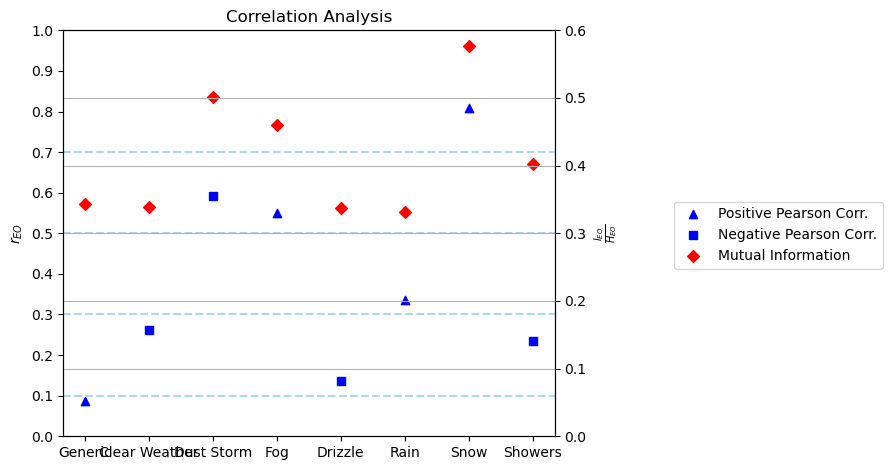

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)

# Define the correlation thresholds
high_corr = 0.7
moderate_corr = 0.5
low_corr = 0.3

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines
ax1.axhline(y=high_corr, color='lightblue', linestyle='--')
ax1.axhline(y=moderate_corr, color='lightblue', linestyle='--')
ax1.axhline(y=low_corr, color='lightblue', linestyle='--')
ax1.axhline(y=negligible_corr, color='lightblue', linestyle='--')

# Set labels and title
ax1.set_ylabel('$r_{EO}$')
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylabel('$\\frac{I_{EO}}{H_{EO}}$')

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')

# Set limits and labels
ax2.set_ylim(0, 0.6)

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))

# Show the plot
plt.title('Correlation Analysis')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


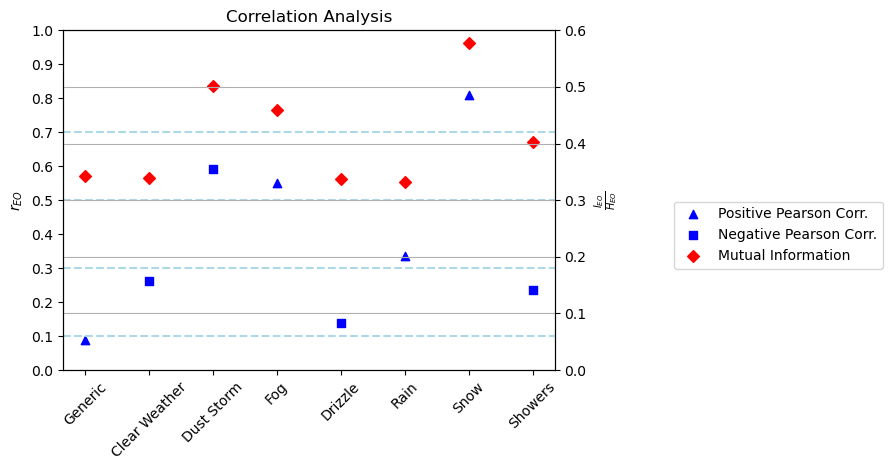

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)

# Define the correlation thresholds
high_corr = 0.7
moderate_corr = 0.5
low_corr = 0.3


# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines
ax1.axhline(y=high_corr, color='lightblue', linestyle='--')
ax1.axhline(y=moderate_corr, color='lightblue', linestyle='--')
ax1.axhline(y=low_corr, color='lightblue', linestyle='--')
ax1.axhline(y=negligible_corr, color='lightblue', linestyle='--')

# Set labels and title
ax1.set_ylabel('$r_{EO}$')
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylabel('$\\frac{I_{EO}}{H_{EO}}$')

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')

# Set limits and labels
ax2.set_ylim(0, 0.6)

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))
# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

# Italicize model names with fontdict
plt.xticks(df.index, df['Model'], rotation=45, fontdict={'fontstyle': 'italic'}, ha='right')
plt.title('Correlation Analysis')
plt.xlabel('Model')
plt.grid(True)
plt.tight_layout()
plt.show()


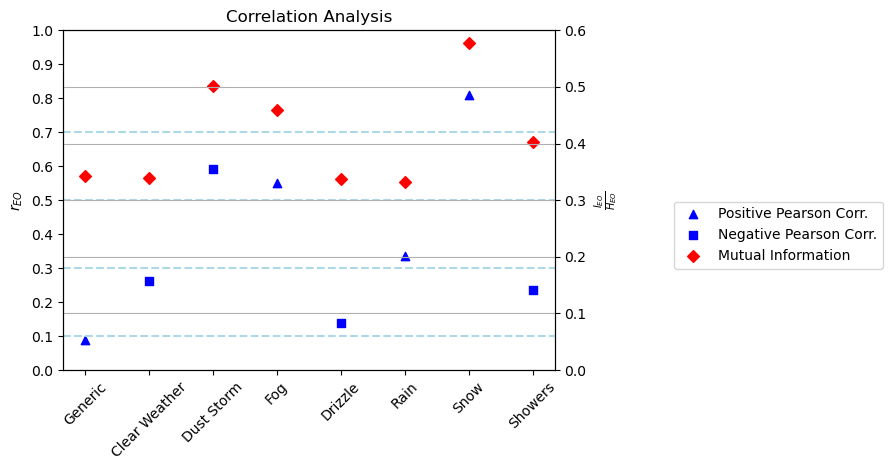

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)

# Define the correlation thresholds
high_corr = 0.7
moderate_corr = 0.5
low_corr = 0.3


# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines
ax1.axhline(y=high_corr, color='lightblue', linestyle='--')
ax1.axhline(y=moderate_corr, color='lightblue', linestyle='--')
ax1.axhline(y=low_corr, color='lightblue', linestyle='--')
ax1.axhline(y=negligible_corr, color='lightblue', linestyle='--')

# Set labels and title
ax1.set_ylabel('$r_{EO}$')
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylabel('$\\frac{I_{EO}}{H_{EO}}$')

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')

# Set limits and labels
ax2.set_ylim(0, 0.6)

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))
# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

# Italicize model names with fontdict
plt.xticks(df.index, df['Model'], rotation=45, fontdict={'fontstyle': 'italic'}, ha='right')
plt.title('Correlation Analysis')
plt.xlabel('Model')
plt.grid(True)
plt.tight_layout()
plt.show()


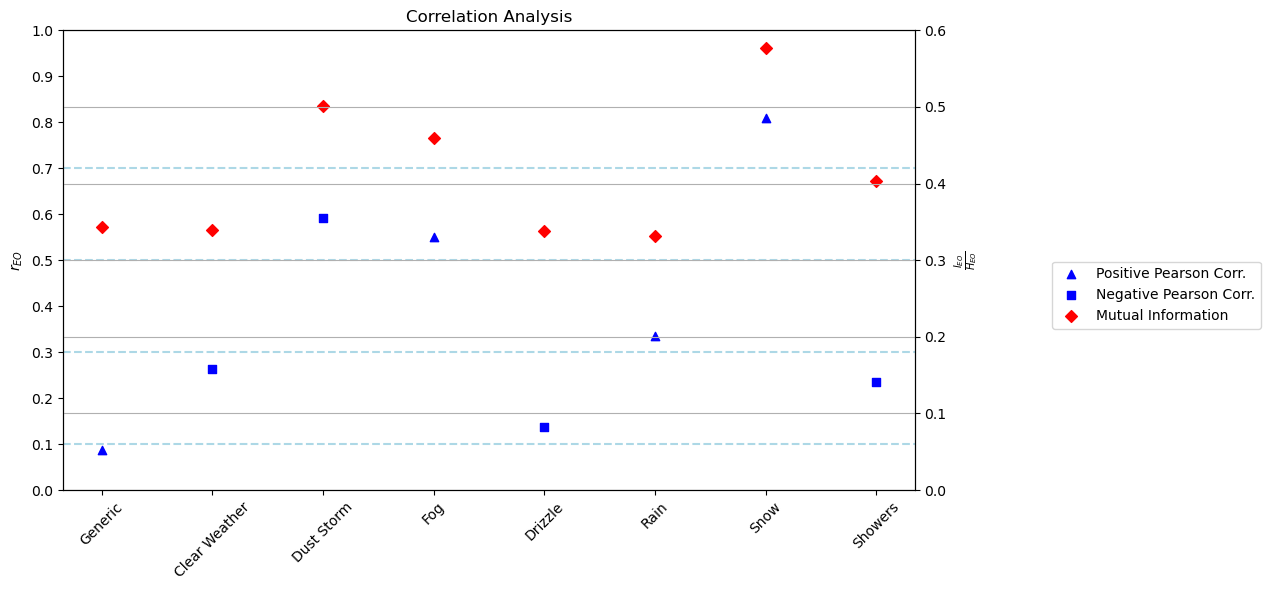

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)

# Define the correlation thresholds
high_corr = 0.7
moderate_corr = 0.5
low_corr = 0.3
negligible_corr = 0.1

# Create the plot with increased figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines
ax1.axhline(y=high_corr, color='lightblue', linestyle='--')
ax1.axhline(y=moderate_corr, color='lightblue', linestyle='--')
ax1.axhline(y=low_corr, color='lightblue', linestyle='--')
ax1.axhline(y=negligible_corr, color='lightblue', linestyle='--')

# Set labels and title
ax1.set_ylabel('$r_{EO}$')
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylabel('$\\frac{I_{EO}}{H_{EO}}$')

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')

# Set limits and labels
ax2.set_ylim(0, 0.6)

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

fig.subplots_adjust(bottom=0.35)  # Adjust bottom margin to ensure space for labels
plt.title('Correlation Analysis')
plt.xlabel('Model')
plt.grid(True)
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()


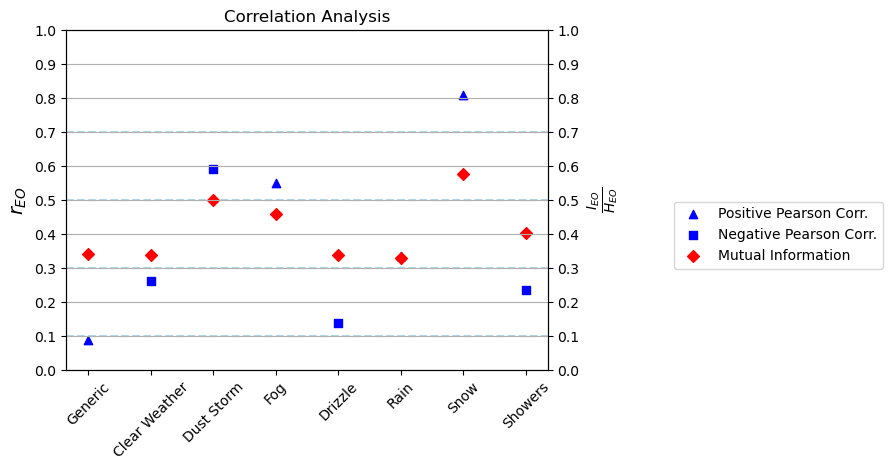

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)

# Define the correlation thresholds
high_corr = 0.7
moderate_corr = 0.5
low_corr = 0.3
negligible_corr = 0.1

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines
ax1.axhline(y=high_corr, color='lightblue', linestyle='--')
ax1.axhline(y=moderate_corr, color='lightblue', linestyle='--')
ax1.axhline(y=low_corr, color='lightblue', linestyle='--')
ax1.axhline(y=negligible_corr, color='lightblue', linestyle='--')

# Set labels and title
ax1.set_ylabel('$r_{EO}$', fontsize=14)  # Increased font size for ylabel
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylabel('$\\frac{I_{EO}}{H_{EO}}$', fontsize=14)  # Increased font size for ylabel
ax2.set_ylim(0, 1)  # Match limits of ax1
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')

# Set limits and labels
ax2.set_ylim(0, 1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))
# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

plt.title('Correlation Analysis')
plt.xlabel('Model')
plt.grid(True)
plt.tight_layout()
plt.show()


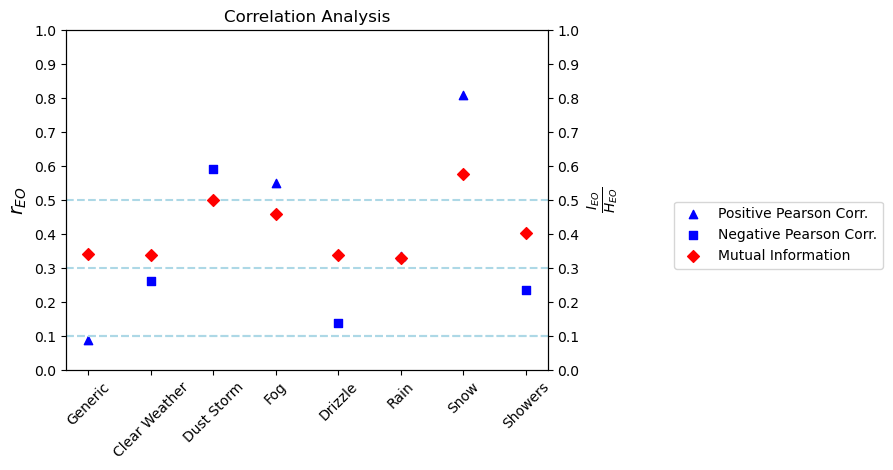

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)


# Define the correlation thresholds based on commonly accepted standards
high_corr = 0.5  # Strong correlation: r > 0.5 or r < -0.5
moderate_corr = 0.3  # Moderate correlation: 0.3 < r < 0.5 or -0.5 < r < -0.3
low_corr = 0.1  # Low correlation: 0 < r < 0.3 or -0.3 < r < 0

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines to ax1 only
ax1.axhline(y=high_corr, color='lightblue', linestyle='--')
ax1.axhline(y=moderate_corr, color='lightblue', linestyle='--')
ax1.axhline(y=low_corr, color='lightblue', linestyle='--')
ax1.axhline(y=negligible_corr, color='lightblue', linestyle='--')

# Set labels and title for ax1
ax1.set_ylabel('$r_{EO}$', fontsize=14)  # Increased font size for ylabel
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals
ax1.grid(False)  # Disable grid lines for ax1

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylabel('$\\frac{I_{EO}}{H_{EO}}$', fontsize=14)  # Increased font size for ylabel
ax2.set_ylim(0, 1)  # Match limits of ax1
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')
ax2.grid(False)  # Disable grid lines for ax2

# Set limits and labels for ax2 without additional lines
ax2.set_ylim(0, 1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

plt.title('Correlation Analysis')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


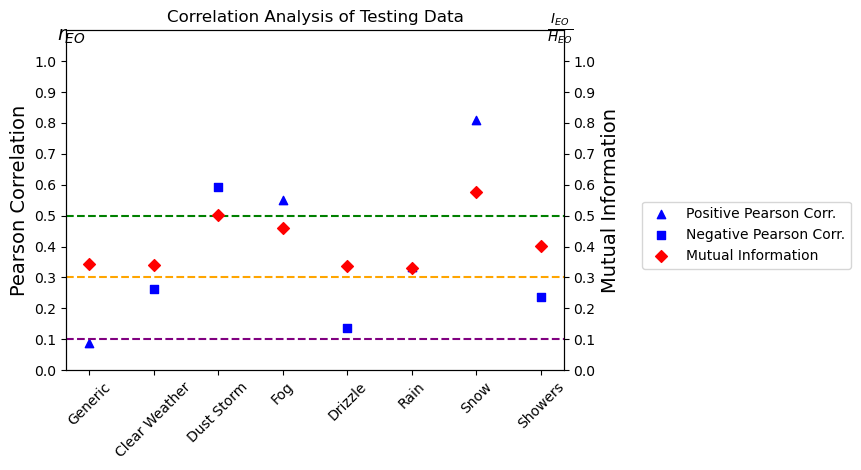

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)

# Define the correlation thresholds based on commonly accepted standards
high_corr = 0.5  # Strong correlation: r > 0.5 or r < -0.5
moderate_corr = 0.3  # Moderate correlation: 0.3 < r < 0.5 or -0.5 < r < -0.3
low_corr = 0.1  # Low correlation: 0 < r < 0.3 or -0.3 < r < 0

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines to ax1 only
ax1.axhline(y=high_corr, color='green', linestyle='--')
ax1.axhline(y=moderate_corr, color='orange', linestyle='--')
ax1.axhline(y=low_corr, color='purple', linestyle='--')

# Add text labels at the top left and right corners above the 1.0 value
ax1.text(-0.5, 1.05, '$r_{EO}$', fontsize=14, verticalalignment='bottom', horizontalalignment='left')
ax1.text(len(df) - 0.5, 1.05, '$\\frac{I_{EO}}{H_{EO}}$', fontsize=14, verticalalignment='bottom', horizontalalignment='right')

# Set labels and title for ax1
ax1.set_ylabel('Pearson Correlation', fontsize=14)  # Updated label with description
ax1.set_ylim(0, 1.1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals
ax1.grid(False)  # Disable grid lines for ax1

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylabel('Mutual Information', fontsize=14)  # Updated label with description
ax2.set_ylim(0, 1.1)  # Match limits of ax1
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')
ax2.grid(False)  # Disable grid lines for ax2

# Set limits and labels for ax2 without additional lines
ax2.set_ylim(0, 1.1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(1, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

plt.title('Correlation Analysis of Testing Data')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


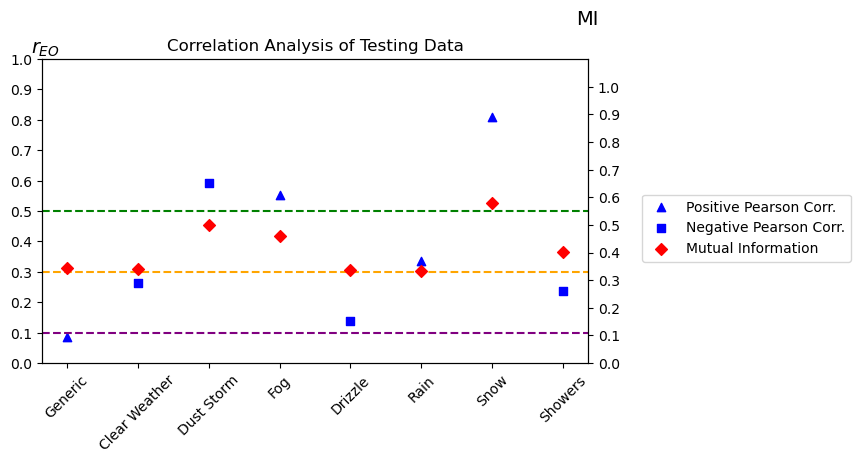

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)

# Define the correlation thresholds based on commonly accepted standards
high_corr = 0.5  # Strong correlation: r > 0.5 or r < -0.5
moderate_corr = 0.3  # Moderate correlation: 0.3 < r < 0.5 or -0.5 < r < -0.3
low_corr = 0.1  # Low correlation: 0 < r < 0.3 or -0.3 < r < 0

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines to ax1 only
ax1.axhline(y=high_corr, color='green', linestyle='--')
ax1.axhline(y=moderate_corr, color='orange', linestyle='--')
ax1.axhline(y=low_corr, color='purple', linestyle='--')

# Add text labels at the top left and right corners above the 1.0 value
ax1.text(-0.5, 1, '$r_{EO}$', fontsize=14, verticalalignment='bottom', horizontalalignment='left')
ax1.text(len(df) - 0.5, 1.1, 'MI', fontsize=14, verticalalignment='bottom', horizontalalignment='right')

# Set labels and title for ax1

ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals
ax1.grid(False)  # Disable grid lines for ax1

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')
ax2.grid(False)  # Disable grid lines for ax2

# Set limits and labels for ax2 without additional lines
ax2.set_ylim(0, 1.1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(1, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

plt.title('Correlation Analysis of Testing Data')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


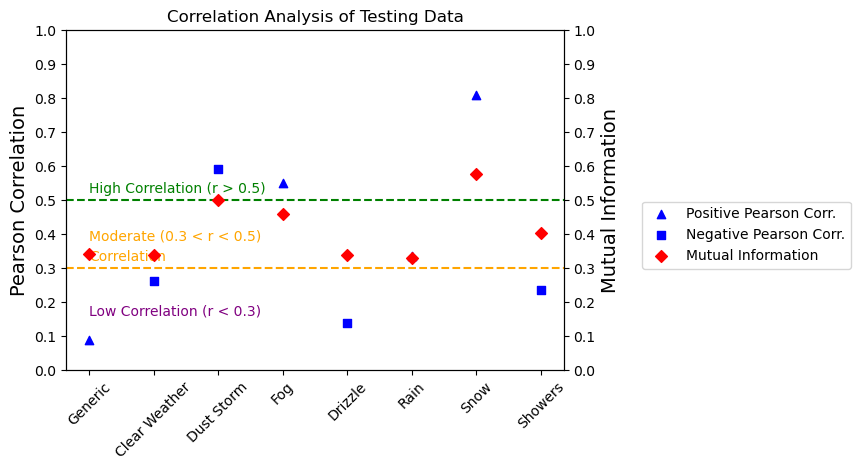

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)


# Define the correlation thresholds based on commonly accepted standards
high_corr = 0.5  # Strong correlation: r > 0.5 or r < -0.5
moderate_corr = 0.3  # Moderate correlation: 0.3 < r < 0.5 or -0.5 < r < -0.3
low_corr = 0.1  # Low correlation: 0 < r < 0.3 or -0.3 < r < 0

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines to ax1 only
ax1.axhline(y=high_corr, color='green', linestyle='--')
ax1.text(0, high_corr + 0.02, 'High Correlation (r > 0.5)', color='green')

ax1.axhline(y=moderate_corr, color='orange', linestyle='--')
ax1.text(0, moderate_corr + 0.02, 'Correlation', color='orange')
ax1.text(0, moderate_corr + 0.08, 'Moderate (0.3 < r < 0.5)', color='orange')
ax1.text(0, low_corr + 0.06, 'Low Correlation (r < 0.3)', color='purple')

# Set labels and title for ax1
ax1.set_ylabel('Pearson Correlation', fontsize=14)  # Updated label with description
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals
ax1.grid(False)  # Disable grid lines for ax1

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylabel('Mutual Information', fontsize=14)  # Updated label with description
ax2.set_ylim(0, 1)  # Match limits of ax1
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1
# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')
ax2.grid(False)  # Disable grid lines for ax2

# Set limits and labels for ax2 without additional lines
ax2.set_ylim(0, 1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(1, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

plt.title('Correlation Analysis of Testing Data')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


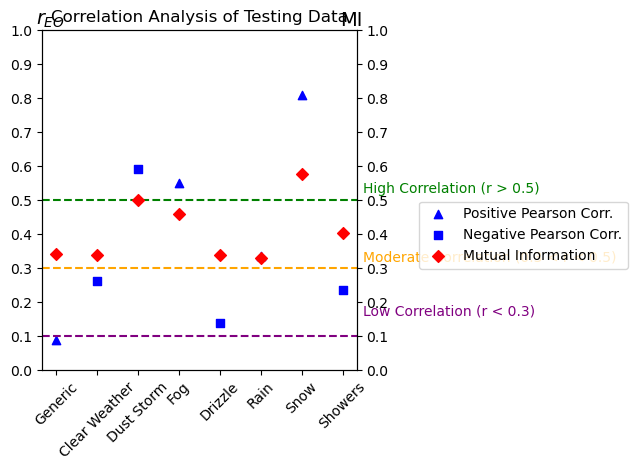

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)

# Define the correlation thresholds based on commonly accepted standards
high_corr = 0.5  # Strong correlation: r > 0.5 or r < -0.5
moderate_corr = 0.3  # Moderate correlation: 0.3 < r < 0.5 or -0.5 < r < -0.3
low_corr = 0.1  # Low correlation: 0 < r < 0.3 or -0.3 < r < 0

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Pearson Corr.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Pearson Corr.' if not positive_label_done else "")
        positive_label_done = True

# Add correlation lines to ax1 only
ax1.axhline(y=high_corr, color='green', linestyle='--')
ax1.text(7.5, high_corr + 0.02, 'High Correlation (r > 0.5)', color='green')

ax1.axhline(y=moderate_corr, color='orange', linestyle='--')
ax1.text(7.5, moderate_corr + 0.02, 'Moderate Correlation (0.3 < r < 0.5)', color='orange')
ax1.axhline(y=low_corr, color='purple', linestyle='--')
ax1.text(7.5, low_corr + 0.06, 'Low Correlation (r < 0.3)', color='purple')

# Set labels and title for ax1

ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals
ax1.grid(False)  # Disable grid lines for ax1

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()

ax2.set_ylim(0, 1)  # Match limits of ax1
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')
ax2.grid(False)  # Disable grid lines for ax2

# Set limits and labels for ax2 without additional lines
ax2.set_ylim(0, 1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2 + ['High Correlation (r > 0.5)', 'Moderate (0.3 < r < 0.5)', 'Low Correlation (r < 0.3)'], 
           loc='center right', bbox_to_anchor=(1, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

# Add text labels at the top left and right corners above the 1.0 value
ax1.text(-0.5, 1, '$r_{EO}$', fontsize=14, verticalalignment='bottom', horizontalalignment='left')
ax1.text(len(df) - 0.5, 1, 'MI', fontsize=14, verticalalignment='bottom', horizontalalignment='right')


plt.title('Correlation Analysis of Testing Data')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


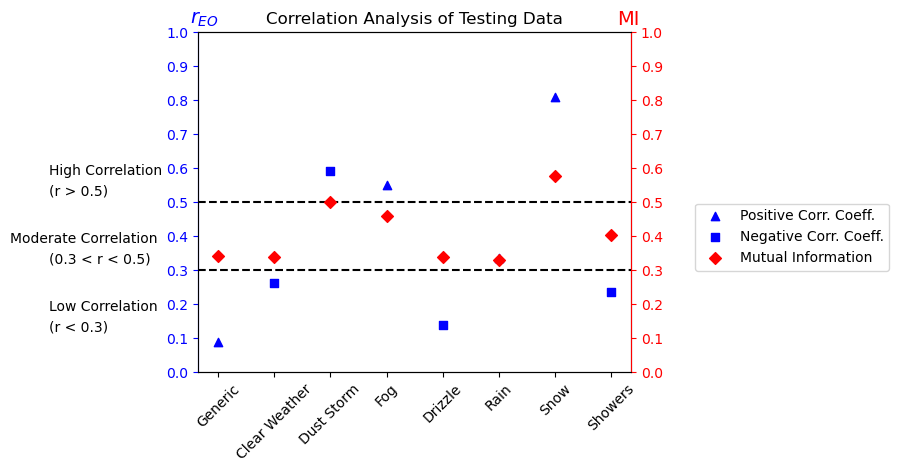

In [352]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.087282153, -0.263021872, -0.592509043, 0.551096645, -0.13727702, 0.335114027, 0.808549998, -0.235658545],
    'Mutual Information': [0.34316334, 0.339104619, 0.501123278, 0.459984232, 0.337482147, 0.331377576, 0.577326173, 0.403044082]
}

df = pd.DataFrame(data)

# Define the correlation thresholds based on commonly accepted standards
high_corr = 0.5  # Strong correlation: r > 0.5 or r < -0.5
moderate_corr = 0.3  # Moderate correlation: 0.3 < r < 0.5 or -0.5 < r < -0.3
low_corr = 0.1  # Low correlation: 0 < r < 0.3 or -0.3 < r < 0

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Corr. Coeff.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Corr. Coeff.' if not positive_label_done else "")
        positive_label_done = True

ax1.axhline(y=high_corr, color='black', linestyle='--')
ax1.text(-3, high_corr + 0.08, 'High Correlation', color='black')
ax1.text(-3, high_corr + 0.02, '(r > 0.5)', color='black')
ax1.axhline(y=moderate_corr, color='black', linestyle='--')
ax1.text(-3.7, moderate_corr + 0.08, 'Moderate Correlation', color='black')
ax1.text(-3, moderate_corr + 0.02, '(0.3 < r < 0.5)', color='black')
ax1.text(-3, low_corr + 0.08, 'Low Correlation', color='black')
ax1.text(-3, low_corr + 0.02, '(r < 0.3)', color='black')


# Set labels and title for ax1
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals
ax1.tick_params(axis='y', colors='blue')
ax1.spines['left'].set_color('blue')
ax1.yaxis.label.set_color('blue')
ax1.yaxis.set_tick_params(color='blue')
ax1.grid(False)  # Disable grid lines for ax1

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylim(0, 1)  # Match limits of ax1
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')
# Customize x-axis lines to be red for ax2
ax2.tick_params(axis='y', colors='red')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.yaxis.set_tick_params(color='red')
ax2.grid(False)  # Disable grid lines for ax2

# Set limits and labels for ax2 without additional lines
ax2.set_ylim(0, 1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

# Add text labels at the top left and right corners above the 1.0 value
ax1.text(-0.5, 1.01, '$r_{EO}$', fontsize=14, verticalalignment='bottom', horizontalalignment='left',color='blue')
ax1.text(len(df) - 0.5, 1.01, 'MI', fontsize=14, verticalalignment='bottom', horizontalalignment='right',color='red')
# Adjust the margins
plt.subplots_adjust(left=0.19, right=0.2, top=5, bottom=4.99)
plt.title('Correlation Analysis of Testing Data')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


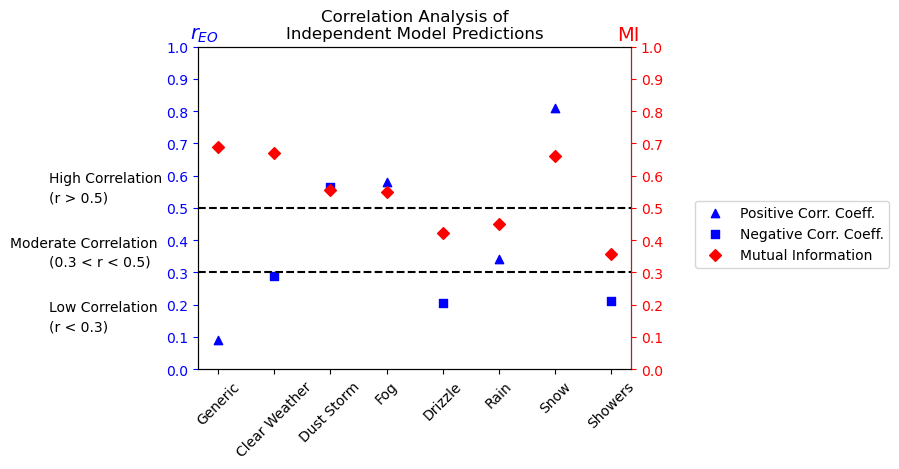

In [351]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.089098766, -0.288906831, -0.566155954, 0.579407645, -0.205714177, 0.342941056, 0.810772037, -0.211497016],
    'Mutual Information': [0.688853412, 0.669895386, 0.554959074, 0.548019812, 0.42226099, 0.451046662, 0.660872466, 0.358323815]
}


df = pd.DataFrame(data)

# Define the correlation thresholds based on commonly accepted standards
high_corr = 0.5  # Strong correlation: r > 0.5 or r < -0.5
moderate_corr = 0.3  # Moderate correlation: 0.3 < r < 0.5 or -0.5 < r < -0.3
low_corr = 0.1  # Low correlation: 0 < r < 0.3 or -0.3 < r < 0

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Corr. Coeff.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Corr. Coeff.' if not positive_label_done else "")
        positive_label_done = True

ax1.axhline(y=high_corr, color='black', linestyle='--')
ax1.text(-3, high_corr + 0.08, 'High Correlation', color='black')
ax1.text(-3, high_corr + 0.02, '(r > 0.5)', color='black')
ax1.axhline(y=moderate_corr, color='black', linestyle='--')
ax1.text(-3.7, moderate_corr + 0.08, 'Moderate Correlation', color='black')
ax1.text(-3, moderate_corr + 0.02, '(0.3 < r < 0.5)', color='black')
ax1.text(-3, low_corr + 0.08, 'Low Correlation', color='black')
ax1.text(-3, low_corr + 0.02, '(r < 0.3)', color='black')




# Set labels and title for ax1
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals
ax1.tick_params(axis='y', colors='blue')
ax1.spines['left'].set_color('blue')
ax1.yaxis.label.set_color('blue')
ax1.yaxis.set_tick_params(color='blue')
ax1.grid(False)  # Disable grid lines for ax1

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylim(0, 1)  # Match limits of ax1
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')
# Customize x-axis lines to be red for ax2
ax2.tick_params(axis='y', colors='red')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.yaxis.set_tick_params(color='red')
ax2.grid(False)  # Disable grid lines for ax2



# Set limits and labels for ax2 without additional lines
ax2.set_ylim(0, 1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

# Add text labels at the top left and right corners above the 1.0 value
ax1.text(-0.5, 1.01, '$r_{EO}$', fontsize=14, verticalalignment='bottom', horizontalalignment='left',color='blue')
ax1.text(len(df) - 0.5, 1.01, 'MI', fontsize=14, verticalalignment='bottom', horizontalalignment='right',color='red')

# Adjust the margins
plt.subplots_adjust(left=0.19, right=0.2, top=5, bottom=4.99)
plt.title('Correlation Analysis of\nIndependent Model Predictions')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


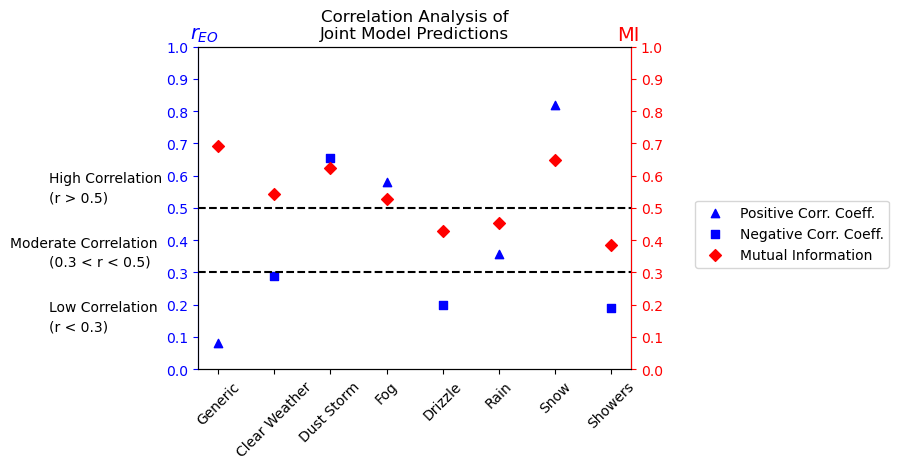

In [350]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['Generic', 'Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers'],
    'Pearson': [0.080084323, -0.288723391, -0.654886175, 0.580208106, -0.197979203, 0.358135028, 0.818150248, -0.190612251],
    'Mutual Information': [0.691558506, 0.54374942, 0.623450667, 0.529104727, 0.427318101, 0.451849306, 0.649772551, 0.383482336]
}

df = pd.DataFrame(data)

# Define the correlation thresholds based on commonly accepted standards
high_corr = 0.5  # Strong correlation: r > 0.5 or r < -0.5
moderate_corr = 0.3  # Moderate correlation: 0.3 < r < 0.5 or -0.5 < r < -0.3
low_corr = 0.1  # Low correlation: 0 < r < 0.3 or -0.3 < r < 0

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Corr. Coeff.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Corr. Coeff.' if not positive_label_done else "")
        positive_label_done = True

ax1.axhline(y=high_corr, color='black', linestyle='--')
ax1.text(-3, high_corr + 0.08, 'High Correlation', color='black')
ax1.text(-3, high_corr + 0.02, '(r > 0.5)', color='black')
ax1.axhline(y=moderate_corr, color='black', linestyle='--')
ax1.text(-3.7, moderate_corr + 0.08, 'Moderate Correlation', color='black')
ax1.text(-3, moderate_corr + 0.02, '(0.3 < r < 0.5)', color='black')
ax1.text(-3, low_corr + 0.08, 'Low Correlation', color='black')
ax1.text(-3, low_corr + 0.02, '(r < 0.3)', color='black')


# Set labels and title for ax1
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals
ax1.tick_params(axis='y', colors='blue')
ax1.spines['left'].set_color('blue')
ax1.yaxis.label.set_color('blue')
ax1.yaxis.set_tick_params(color='blue')
ax1.grid(False)  # Disable grid lines for ax1

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylim(0, 1)  # Match limits of ax1
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')
# Customize x-axis lines to be red for ax2
ax2.tick_params(axis='y', colors='red')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.yaxis.set_tick_params(color='red')
ax2.grid(False)  # Disable grid lines for ax2

# Set limits and labels for ax2 without additional lines
ax2.set_ylim(0, 1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

# Add text labels at the top left and right corners above the 1.0 value
ax1.text(-0.5, 1.01, '$r_{EO}$', fontsize=14, verticalalignment='bottom', horizontalalignment='left',color='blue')
ax1.text(len(df) - 0.5, 1.01, 'MI', fontsize=14, verticalalignment='bottom', horizontalalignment='right',color='red')

# Adjust the margins
plt.subplots_adjust(left=0.19, right=0.2, top=5, bottom=4.99)
plt.title('Correlation Analysis of\nJoint Model Predictions')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


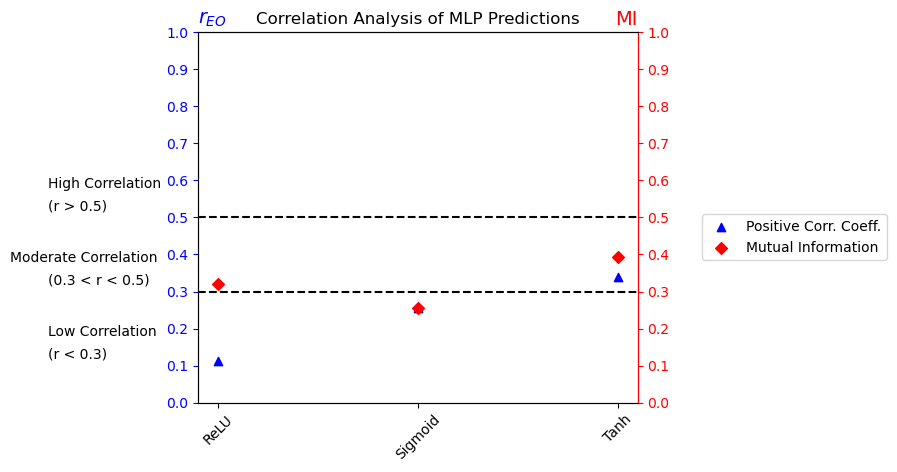

In [356]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = {
    'Model': ['ReLU', 'Sigmoid', 'Tanh'],
    'Pearson': [0.111805712, 0.256602827, 0.339829376],
    'Mutual Information': [0.319796712, 0.254588, 0.392530954]
}
df = pd.DataFrame(data)

# Define the correlation thresholds based on commonly accepted standards
high_corr = 0.5  # Strong correlation: r > 0.5 or r < -0.5
moderate_corr = 0.3  # Moderate correlation: 0.3 < r < 0.5 or -0.5 < r < -0.3
low_corr = 0.1  # Low correlation: 0 < r < 0.3 or -0.3 < r < 0

# Create the plot
fig, ax1 = plt.subplots()

# Plot Pearson correlations with absolute values
negative_label_done = False
positive_label_done = False
for i, row in df.iterrows():
    abs_pearson = abs(row['Pearson'])
    if row['Pearson'] < 0:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='s', label='Negative Corr. Coeff.' if not negative_label_done else "")
        negative_label_done = True
    else:
        ax1.scatter(row['Model'], abs_pearson, color='blue', marker='^', label='Positive Corr. Coeff.' if not positive_label_done else "")
        positive_label_done = True


ax1.axhline(y=high_corr, color='black', linestyle='--')
ax1.text(-0.85, high_corr + 0.08, 'High Correlation', color='black')
ax1.text(-0.85, high_corr + 0.02, '(r > 0.5)', color='black')
ax1.axhline(y=moderate_corr, color='black', linestyle='--')
ax1.text(-1.04, moderate_corr + 0.08, 'Moderate Correlation', color='black')
ax1.text(-0.85, moderate_corr + 0.02, '(0.3 < r < 0.5)', color='black')
ax1.text(-0.85, low_corr + 0.08, 'Low Correlation', color='black')
ax1.text(-0.85, low_corr + 0.02, '(r < 0.3)', color='black')


# Set labels and title for ax1

ax1.set_ylim(0, 1)
ax1.set_yticks([i/10 for i in range(11)])  # Set y-axis labels from 0 to 1 with 0.1 intervals
ax1.tick_params(axis='y', colors='blue')
ax1.spines['left'].set_color('blue')
ax1.yaxis.label.set_color('blue')
ax1.yaxis.set_tick_params(color='blue')
ax1.grid(False)  # Disable grid lines for ax1

# Create a second y-axis for the mutual information
ax2 = ax1.twinx()
ax2.set_ylim(0, 1)  # Match limits of ax1
ax2.set_yticks([i/10 for i in range(11)])  # Match ticks of ax1

# Plot mutual information
ax2.scatter(df['Model'], df['Mutual Information'], color='red', marker='D', label='Mutual Information')
# Customize x-axis lines to be red for ax2
ax2.tick_params(axis='y', colors='red')
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.yaxis.set_tick_params(color='red')
ax2.grid(False)  # Disable grid lines for ax2

# Set limits and labels for ax2 without additional lines
ax2.set_ylim(0, 1)  # Align right y-axis range with left y-axis

# Combine legends and add custom labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Explicitly rotate and align x-axis labels
ax1.set_xticks(df.index)
ax1.set_xticklabels(df['Model'], rotation=45, ha='center')  # Setting ha to 'center' to center the labels

# Add text labels at the top left and right corners above the 1.0 value
ax1.text(-0.1, 1.01, '$r_{EO}$', fontsize=14, verticalalignment='bottom', horizontalalignment='left', color='blue')
ax1.text(len(df) - 0.9, 1.01, 'MI', fontsize=14, verticalalignment='bottom', horizontalalignment='right', color='red')

# Adjust the margins
plt.subplots_adjust(left=0.19, right=0.2, top=5, bottom=4.99)
plt.title('Correlation Analysis of MLP Predictions')
plt.xlabel('Model')
plt.tight_layout()
plt.show()
